# 데이터 전처리

- 데이터 품질과 데이터에 담긴 유용한 정보의 양은 머신 러닝 알고리즘을 얼마나 잘 학습 할 수 있는지 결정하는 중요한 요소
- 그러므로, 전처리 과정은 매우 중요
- 데이터셋에서 누락된 값을 제거하거나 대체하기
- 머신 러닝 알고리즘을 위해 범주형 데이터 변환
- 모델과 관련이 높은 특성 선택하기 

In [2]:
# 누락된 데이터 다루기

import pandas as pd
from io import StringIO

csv_data = \
''' A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


예제를 위하여 StringIO 함수를 사용했습니다. 이 함수를 이용하면 하드 디스크에 있는 일반 CSV 파일처럼 csv_data에 저장된 문자열을 읽어 판다스 DataFrame으로 변환할 수 있습니다. 아주 큰 데이터 프레임의 경우 수동으로 누락 값을 찾는 것을 매우 번거롭습니다. isnull() 메서드는 셀이 수차 값을 담고 있는지 또는  누락되어 있는지 나타내는 부리언 값이 채워진 DataFrame을 반환합니다. df.insull().sum() 으로 누락된 값의 개수를 얻을 수도 있습니다.

In [3]:
df.isnull().sum()

 A    0
B     0
C     1
D     1
dtype: int64

사이킷런이 넘파이 배열을 다룰 수 있도록 개발되었지만 판다스 DataFrame을 사용하여 데이터를 전처리하는 것이 더 편리합니다. 사이킷런의 추정기에 주입하기 전에 DataFrame의 values 속성을 사용하여 언제나 넘파이 배열을 얻을 수 있습니다. ( 참고 사항 ) 

In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [5]:
df.dropna(axis = 0) # 가로 

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
df.dropna(axis = 1) # 세로 

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [8]:
# 모든 열이 NaN일 때만 행을 삭제합니다.
# 해당 예제에서는 NaN이 없기 때문에 전체 배열이 반환됩니다.

df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [10]:
# 실수 값이 네 개보다 작은 행을 삭제합니다.
df.dropna(thresh = 4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [11]:
# 특정 열에 NaN이 있는 행만 삭제합니다.( 여기서는 'C'열)
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [20]:
!pip install scikit-learn --user --upgrade

     ---------------------------------------- 8.4/8.4 MB 10.5 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.0 MB/s eta 0:00:00


In [30]:
# 보간 기법 사용하기
# 가장 흔한 보간 기법 중 하나는 평균 대체
import numpy as np
from sklearn.impute import SimpleImputer
simr = SimpleImputer(missing_values = np.nan ,strategy = 'mean')
simr = simr.fit(df.values)
imputed_data = simr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

## 범주형 데이터 다루기 
- 수치 계산용 라이브러리 다루기

In [31]:
# 범주형 데이터셋
import pandas as pd
df= pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']])
df.columns = ['colors','size','price','classlabel']
df

,colors,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [32]:
# 순서 특성 매핑
size_mapping = {
    'XL' : 3,
    'L' :2,
    'M':1}

df['size'] = df['size'].map(size_mapping)
df

,colors,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [33]:
# 클래스 레이블 인코딩
class_mapping = {label:idx for idx,label in 
                enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [34]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,colors,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [37]:
from sklearn.preprocessing import LabelEncoder

# 순서가 없는 특성에 원-핫 인코딩 적용
X = df[['colors','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

앞 코드를 실행하면 넘파이 배열 X의 첫 번째 열은 다음과 같은 새로운 color 값을 가진다.

- blue = 0
- green = 1
- red = 2

In [40]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()


TypeError: __init__() got an unexpected keyword argument 'categorical_features'

categorical_features 매개변수는 사이킷런 0.22 버전부터 삭제.
- ColumnTransformer를 사용해야함
- 데이터셋에 있는 고유한 정수 또는 문자열을 카테고리로 사용해야함
- 고유한 값을 사용하는 방식을 선택하기 위해 catagories 매개변수를 auto로 지정 필요

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

oh_enc = OneHotEncoder(catagories = 'auto')
col_trans = ColumnTransformer(['oh_enc', oh_enc, [0]], remainder = 'passthrough')
col_trans.fit_transform(X)

TypeError: __init__() got an unexpected keyword argument 'catagories'

In [45]:
pd.get_dummies(df[['price','colors','size']],
              drop_first = True)


,price,size,colors_green,colors_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


## 데이터셋을 훈련 세트와 테스트 세트로 나누기


In [50]:
df_wine = pd.read_csv('wine.data',header = None)
df_wine.columns = ['Class label','Alcohol',
                  'Malic acid','Ash',
                  'Alcalinity of ash','Magnesium',
                  'Total phenols','Flavanoids',
                  'nonflavanoid phenols',
                   'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'diluted wines',
                  'proline']
print('클래스 레이블', np.unique(df_wine['Class label']))
df_wine.head()

클래스 레이블 [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [54]:
from sklearn.model_selection import train_test_split
X,y =df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test,y_train,y_test =\
train_test_split(X,y,
                test_size = 0.3,
                random_state = 0,
                stratify=y)

## 특성 스케일 맞추기
- 정규화(normalization)
- 표준화(standardization)

In [56]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [59]:
ex = np.array([0,1,2,3,4,5])
print('표준화:', (ex-ex.mean()) / ex.std())
print('정규화:', (ex-ex.min()) / (ex.max() - ex.min()))

표준화: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화: [0.  0.2 0.4 0.6 0.8 1. ]


In [61]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## 유용한 특성 선택

- 모델이 테스트 세트보다 훈련 세트에서 성능이 높다면 과대적합에 강력한 신호
- 일반화 오차를 줄이기 위한 방법은 아래와 같다.
- 더 많은 훈련 데이터 모으기
- 규제를 통해 복잡도 제한
- 파라미터 개수가 적은 간단한 모델 사용
- 데이터 차원 줄이기


In [62]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(solver='liblinear', penalty='l1')

LogisticRegression(penalty='l1', solver='liblinear')

In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto', 
                        penalty='l1', C=1.0, random_state=42)
# C=1.0이 기본값입니다. 값을 증가시키거나 줄여서 
# 규제 효과를 크게 또는 약하게 할 수 있습니다.
lr.fit(X_train_std, y_train)
print('훈련 정확도:', lr.score(X_train_std, y_train))
print('테스트 정확도:', lr.score(X_test_std, y_test))

훈련 정확도: 1.0
테스트 정확도: 1.0


In [64]:
lr.intercept_

array([-1.26337062, -1.21589856, -2.37123021])

In [65]:
np.set_printoptions(8)

In [66]:
lr.coef_[lr.coef_!=0].shape

(23,)

In [67]:
lr.coef_

array([[ 1.24576659,  0.18058767,  0.74350018, -1.16124724,  0.        ,
         0.        ,  1.16980876,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54766459,  2.51035195],
       [-1.53733962, -0.38708383, -0.99527244,  0.36471957, -0.05950713,
         0.        ,  0.66789801,  0.        ,  0.        , -1.93398986,
         1.2340047 ,  0.        , -2.23193492],
       [ 0.13548833,  0.16993776,  0.35772851,  0.        ,  0.        ,
         0.        , -2.43321771,  0.        ,  0.        ,  1.56140709,
        -0.81736863, -0.49774774,  0.        ]])

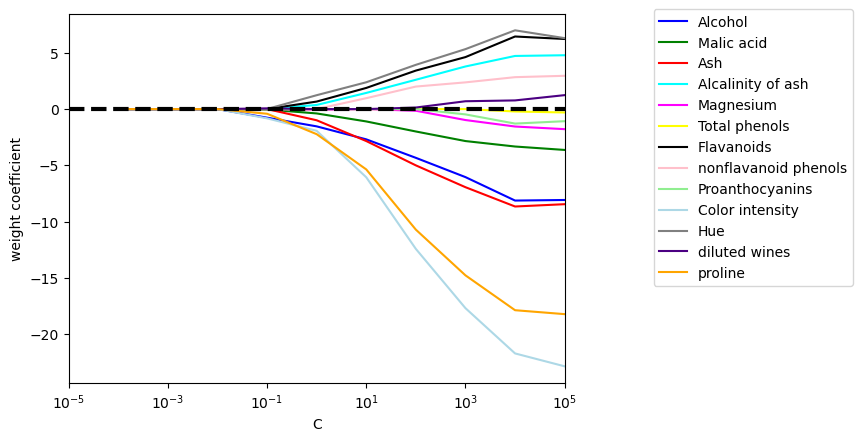

In [68]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(solver='liblinear', multi_class='auto',
                            penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [69]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

C:\Users\aaaaader567\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\aaaaader567\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

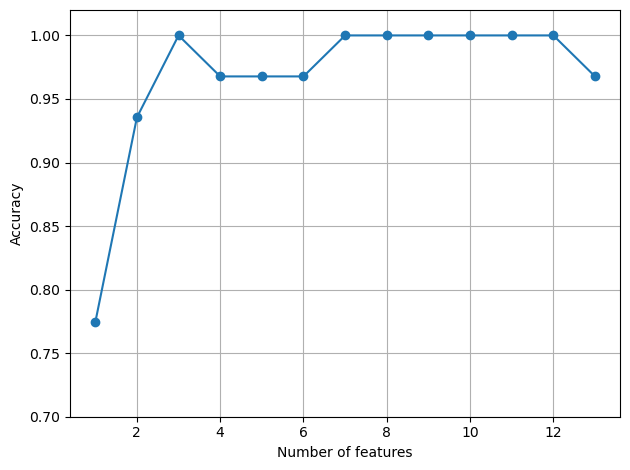

In [70]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 특성을 선택합니다.
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 특성 조합의 성능 그래프를 출력합니다.
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [71]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'diluted wines'], dtype='object')


In [72]:
knn.fit(X_train_std, y_train)
print('훈련 정확도:', knn.score(X_train_std, y_train))
print('테스트 정확도:', knn.score(X_test_std, y_test))

훈련 정확도: 0.967741935483871
테스트 정확도: 0.9629629629629629


C:\Users\aaaaader567\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\aaaaader567\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [73]:
knn.fit(X_train_std[:, k3], y_train)
print('훈련 정확도:', knn.score(X_train_std[:, k3], y_train))
print('테스트 정확도:', knn.score(X_test_std[:, k3], y_test))

훈련 정확도: 0.9516129032258065
테스트 정확도: 0.9259259259259259


C:\Users\aaaaader567\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\aaaaader567\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

## 랜덤 포레스트의 특성 중요도 사용

- 트리 기반 모델은 표준화나 정규화를 할 필요가 없다


 1) proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) diluted wines                  0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) nonflavanoid phenols           0.013354
13) Ash                            0.013279


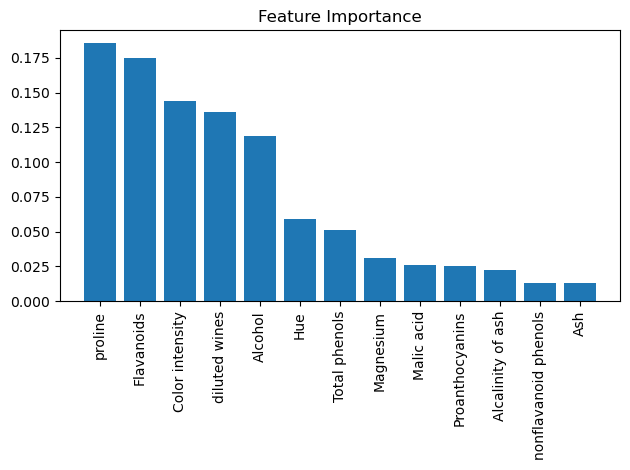

In [74]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [75]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수:', X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수: 5


In [76]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) diluted wines                  0.136162
 5) Alcohol                        0.118529


## 요약

- 머신 러닝 알고리즘에 데이터를 주입하기 전 범주형 변수를 올바르게 인코딩을 해야 함.
- 순서가 있는 것, 없는 것의 특성 값을 정수 표현으로 매핑
- 모델 복잡도를 감소 시키며 과대적합 피하는 L1 규제
- 관련 없는 특성을 제거하는 방법으로 순차 특성 선택 알고리즘을 사용하여 데이터셋에서 의미 있는 특성 선택
